# Properties of (Milky Way) Subhalos

Start with some numerical junk:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib.ticker import LogLocator

from scipy.integrate import quad

#Plotting parameters ----------------
font = {'family' : 'serif',
        'size'   : 20}

mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.linewidth'] = 1.0

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rc('text', usetex=True)
mpl.rc('font', **font)

from scipy.interpolate import interp1d
from scipy.integrate import quad,cumtrapz, odeint
from scipy.special import erf

#### Characteristic density and radii of sub-halos

In [3]:
rho_tilde_GeV = 9.745e-4 #GeV/cm^3
rho_tilde = rho_tilde_GeV/37.96 #Msun/pc^3

def f_NFW(c_v):
    return np.log(1+c_v) - c_v/(1+c_v)

def calc_rhos(m,c_v):
    #GeV/cm^3
    return (c_v**3*rho_tilde_GeV)/(3*f_NFW(c_v))

def calc_rs(m, c_v):
    #kpc
    return 1e-3*((3*m)/(4*np.pi*c_v**3*rho_tilde))**(1/3.0)

#m in solar masses...
def mean_logc(m):
    alpha = 1.627774 -0.2458+ 0.01716
    beta = 1.66079 +  0.00359 - 1.6901
    gamma = -0.02049+ 0.0253
    #print(alpha, beta, gamma)
    
    return alpha + beta*np.log10(m)*(1 + gamma*(np.log10(m))**2)

#### NFW density profile

In [4]:
#NFW density profile as a function of characteristic density and radius
def rho_NFW(r, rho_s, r_s):
    return rho_s/((r/r_s)*(1+r/r_s)**2)

#NFW density profile for a subhalo of a given mass...
def rho_NFW_m(r, m):
    c_v = 10**mean_logc(m)
    rho_s = calc_rhos(m,c_v)
    r_s = calc_rs(m, c_v)
    return rho_NFW(r, rho_s, r_s)

#### Plot some examples

Note that $1\,M_\odot \,\mathrm{pc}^{-3} \approx 37.96 \,\mathrm{GeV}\,\mathrm{cm}^{-3}$...

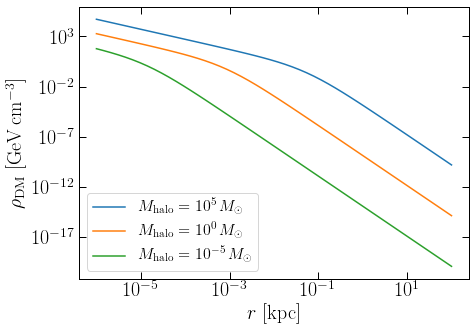

In [5]:
#Radius in kpc
r_list = np.logspace(-6, 2)

plt.figure(figsize=(7,5))

#Mass in solar mass
for m in [1e5, 1, 1e-5]:
    plt.loglog(r_list, rho_NFW_m(r_list, m), label=r'$M_\mathrm{halo} = 10^{' +  str(int(np.log10(m))) + '}\,M_\odot$')

plt.legend(fontsize=16., loc='lower left')

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\rho_\mathrm{DM}$ [$\mathrm{GeV}\,\mathrm{cm}^{-3}$]')

#plt.savefig("../Plots/ExampleDensityProfiles.pdf", bbox_inches='tight')

plt.show()